# Summary

1. Exploratory Data Analysis
    - Aggregate login counts within 15min intervals
        - Visualize and describe patterns
    - Report/illustrate important features of demand
        - i.e. daily cycles
    - Report data quality issues, if applicable
2. Experiment and Metrics Design
    - Gotham (Night), Metropolis (Day), Both (Weekends), toll-bridge w/ two-way toll causes drivers to be exclusive to their city.
    - Proposed solution: Ultimate reimburses all toll costs
    - What should the metric of success for encouraging drivers to serve both cities?
    - Describe a practical experiment to compare effectiveness which relates to chosen metric of sucess. Provide details on:
        - Implementation
        - Statistical tests to verify significance
        - Interpretation of results and recommendations to city operations team; with any caveats
3. Predictive Modeling
    - Predict rider retention using data of a cohort who signed up Jan. 2014, data was pulled several months later. Users are retained if active (took a trip) in the preceding 30 days
    - Find the best predictors for retention, offer suggestions to operationalize those insights
        - Clean, EDA, describe approach with sentences/plots
        - Build a predictive model to determine whether or not a user will be active in their 6th month on the system.
            - Dicuss approach, alternatives, concerns
            - How valid is the model?
            - Include indicators of model performance
        - Briefly discuss how Ultimate might leverage insights from the model to improve long-term rider retention

# Import General Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Part 1

1. Exploratory Data Analysis
    - Aggregate login counts within 15min intervals
        - Visualize and describe patterns
    - Report/illustrate important features of demand
        - i.e. daily cycles
    - Report data quality issues, if applicable

## Import Data

In [296]:
path = 'logins.json'
logins = pd.read_json(path)

## EDA

In [297]:
logins.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [298]:
logins.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


### Feature Engineer Logins

In [299]:
# Create columns representing attributes of the login time so to quickly aggregate with them
logins['15min'] = logins.login_time.dt.round('15min').dt.time.astype(str)
logins['Hour'] = logins.login_time.dt.hour
logins['Day of Year'] = logins.login_time.dt.dayofyear
logins['Week'] = logins.login_time.dt.week
logins['Weekday'] = logins.login_time.dt.weekday
logins['Month'] = logins.login_time.dt.month

C:\Users\Noah\AppData\Local\Temp/ipykernel_14788/2403905983.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  logins['Week'] = logins.login_time.dt.week


In [302]:
# Show what the data now looks like
logins.head(3)

,login_time,15min,Hour,Day of Year,Week,Weekday,Month,count
0,1970-01-01 20:13:18,20:15:00,20,1,1,3,1,1
1,1970-01-01 20:16:10,20:15:00,20,1,1,3,1,1
2,1970-01-01 20:16:37,20:15:00,20,1,1,3,1,1


### Total Logins per [Interval]

In [330]:
def line_plot(data, xlabel=False, ylabel=False, title=False, xticks=False, figsize=(20,5)):
    plt.figure(figsize=figsize)
    plt.plot(data)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if xticks:
        plt.xticks(**xticks)
    plt.show();

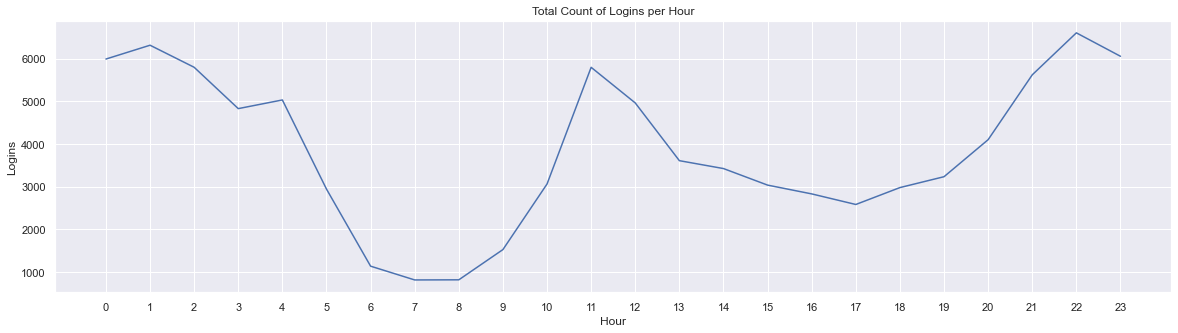

In [335]:
plot_data = logins.groupby('Hour')[['login_time']].count()

line_plot(plot_data, 'Hour', 'Logins', 'Total Count of Logins per Hour', xticks={'ticks':[i for i in range(0,24)]})

*This is maybe the most telling visualization of Ultimate Tech's daily demand cycle*

Peak use times for Gotham are around 9:00PM-2:00AM and for Metropolis 10:30-12:30PM

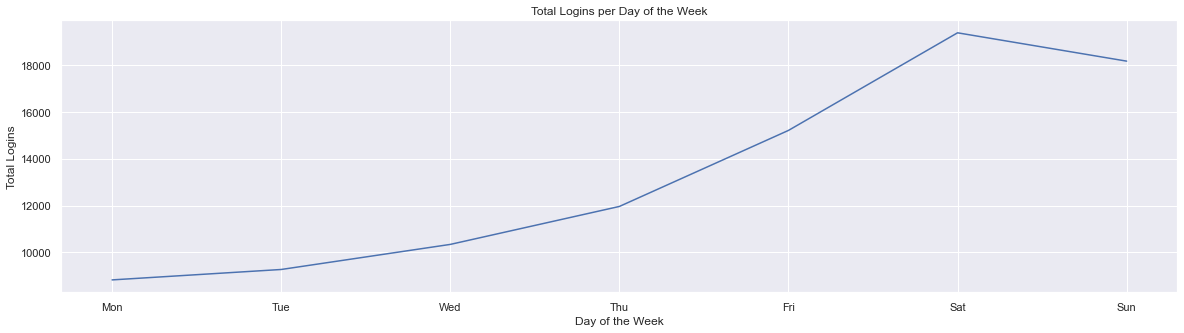

In [333]:
plot_data = logins.groupby('Weekday')[['count']].count()

line_plot(plot_data, 'Day of the Week', 'Total Logins', 'Total Logins per Day of the Week', xticks={'ticks':[i for i in range(0,7)],'labels':['Mon','Tue','Wed','Thu','Fri','Sat','Sun']})

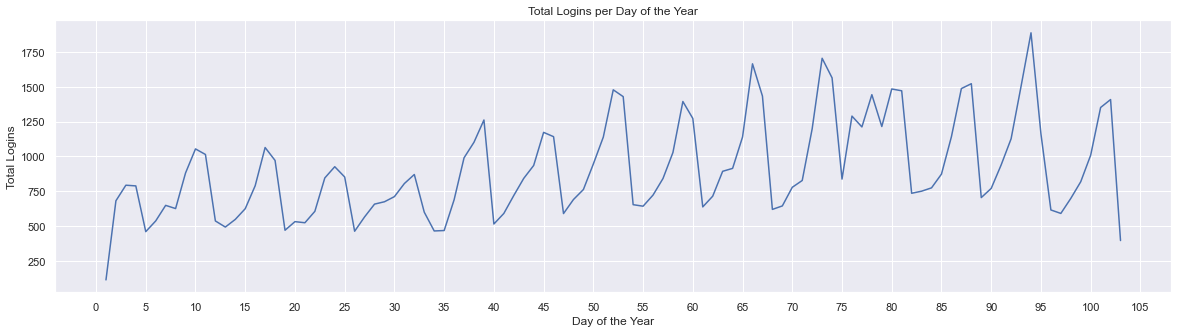

In [347]:
plot_data = logins.groupby('Day of Year')[['count']].count()

line_plot(plot_data, 'Day of the Year', 'Total Logins', 'Total Logins per Day of the Year', xticks={'ticks':[i for i in range(0,106,5)]})

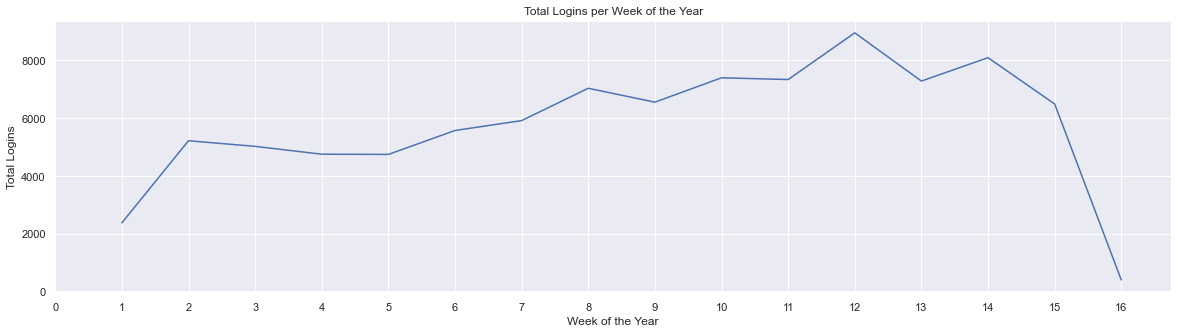

In [349]:
plot_data = logins.groupby('Week')[['count']].count()

line_plot(plot_data, 'Week of the Year', 'Total Logins', 'Total Logins per Week of the Year', xticks={'ticks':[i for i in range(0,17)]})

# Part 2

2. Experiment and Metrics Design
    - Gotham (Night), Metropolis (Day), Both (Weekends), toll-bridge w/ two-way toll causes drivers to be exclusive to their city.
    - Proposed solution: Ultimate reimburses all toll costs
    - What should the metric of success for encouraging drivers to serve both cities?
    - Describe a practical experiment to compare effectiveness which relates to chosen metric of sucess. Provide details on:
        - Implementation
        - Statistical tests to verify significance
        - Interpretation of results and recommendations to city operations team; with any caveats

# Part 3

3. Predictive Modeling
    - Predict rider retention using data of a cohort who signed up Jan. 2014, data was pulled several months later. Users are retained if active (took a trip) in the preceding 30 days
    - Find the best predictors for retention, offer suggestions to operationalize those insights
        - Clean, EDA, describe approach with sentences/plots
        - Build a predictive model to determine whether or not a user will be active in their 6th month on the system.
            - Dicuss approach, alternatives, concerns
            - How valid is the model?
            - Include indicators of model performance
        - Briefly discuss how Ultimate might leverage insights from the model to improve long-term rider retention

## Import Data